# Plots zum Klimawandel

## Global: Durchschnittstemperatur (Land und Ozean zusammen)

Wir wollen nun die globalen Temperaturen visualisieren und greifen dazu auf die Daten der [NASA](https://data.giss.nasa.gov/gistemp/graphs_v4/) zurück.

Es werden somit Daten von Dateien (online oder offline) eingelesen mit der Python Bilbiothek `pandas`

### Daten importieren

In [1]:
import pandas as pd
link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv"

Temp_NASA = pd.read_csv(link, header=1) # einlesen
Temp_NASA # Ausgabe

,Year,No_Smoothing,Lowess(5)
0,1880,-0.16,-0.08
1,1881,-0.08,-0.12
2,1882,-0.10,-0.16
3,1883,-0.16,-0.20
4,1884,-0.28,-0.23
...,...,...,...
136,2016,1.01,0.87
137,2017,0.92,0.91
138,2018,0.85,0.95
139,2019,0.98,0.98


Die Spalten können nun über den Namen des DataFrames und die jeweilige Spalte in eckigen Klammern mit Hochkommas verwendet werden, z.B.:

In [2]:
Temp_NASA["Year"]

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
136    2016
137    2017
138    2018
139    2019
140    2020
Name: Year, Length: 141, dtype: int64

### Daten plotten

**Aufgabe a)** Plotten Sie die Spalte `No_Smoothing` (Werte) und `Lowess(5)` (Glättung) über die (Jahre) mit der Spalte `Year`

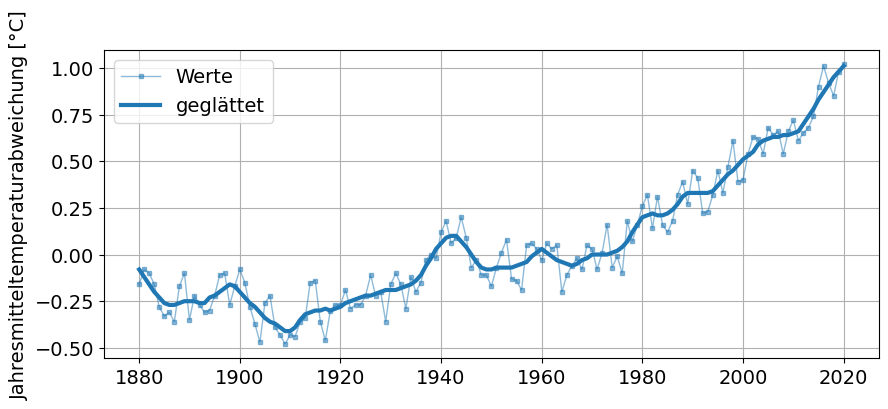

In [3]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_NASA["Year"],Temp_NASA["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:blue", alpha=0.5, label="Werte");
plt.plot(Temp_NASA["Year"],Temp_NASA["Lowess(5)"], lw=3,  color="tab:blue", label="geglättet");
plt.legend();
plt.grid();

### Datenverarbeitung

Die Bibliothek `pandas` ist sehr umfangreich und wird viel zur Datenverarbeitung genutzt. Im folgenden dazu einige Beispiele

**alle Spalten analysieren (Anzahl/Mittelwert/Min/Max/Percentile)**

In [4]:
Temp_NASA.describe()

,Year,No_Smoothing,Lowess(5)
count,141.000000,141.000000,141.000000
mean,1950.000000,0.049291,0.049574
std,40.847277,0.358341,0.347554
min,1880.000000,-0.480000,-0.410000
25%,1915.000000,-0.200000,-0.220000
50%,1950.000000,-0.070000,-0.040000
75%,1985.000000,0.230000,0.220000
max,2020.000000,1.020000,1.010000


**Maximum bestimmen** (Beispiel: stärkster Tempetaturunterschied)

In [5]:
Temp_NASA["No_Smoothing"].max()

1.02

**index zum Maximum bestimmen** (Beispiel: Jahr des stärksten Tempetaturunterschieds)

- Es wird ein `index` (entspricht meistens Zeilennummer) ausgegeben

In [6]:
index_max = Temp_NASA["No_Smoothing"].idxmax()
print(index_max)

140


mit dem `.loc` Befehl wird die Tabelle mit nun gefunden `index` ausgegeben werden

In [7]:
Temp_NASA.loc[index_max]

Year            2020.00
No_Smoothing       1.02
Lowess(5)          1.01
Name: 140, dtype: float64

Mit `.sort_values("Spaltenname")` können wir auch die Tabelle nach dem definierten Spaltennamen sortieren (standardmäßig in **ansteigender** Reihenfolge)

In [8]:
Temp_NASA.sort_values("No_Smoothing")

,Year,No_Smoothing,Lowess(5)
29,1909,-0.48,-0.41
24,1904,-0.47,-0.31
37,1917,-0.46,-0.29
31,1911,-0.44,-0.39
28,1908,-0.43,-0.39
...,...,...,...
135,2015,0.90,0.83
137,2017,0.92,0.91
139,2019,0.98,0.98
136,2016,1.01,0.87


mit `ascending=False` wird absteigend sortiert

In [9]:
Temp_NASA.sort_values("No_Smoothing",ascending=False)

,Year,No_Smoothing,Lowess(5)
140,2020,1.02,1.01
136,2016,1.01,0.87
139,2019,0.98,0.98
137,2017,0.92,0.91
135,2015,0.90,0.83
...,...,...,...
30,1910,-0.43,-0.41
31,1911,-0.44,-0.39
37,1917,-0.46,-0.29
24,1904,-0.47,-0.31


mit `.head(Anzahl)` können wir angeben wieviele Zeilen (vom **Kopf** beginnend) **angezeigt** werden. Mit `.tail(Anzahl)` erfolgt die ausgabe der letzten Werte mit der jeweiligen Anzahl

**WICHTIG**: Der Dataframe `Temp_NASA` wird dadurch nicht verändert, es handelt sich nur um eine Anzeige!

In [10]:
Temp_NASA.sort_values("No_Smoothing",ascending=False).head(10)

,Year,No_Smoothing,Lowess(5)
140,2020,1.02,1.01
136,2016,1.01,0.87
139,2019,0.98,0.98
137,2017,0.92,0.91
135,2015,0.90,0.83
138,2018,0.85,0.95
134,2014,0.74,0.78
130,2010,0.72,0.65
125,2005,0.68,0.62
133,2013,0.68,0.74


**Aufgabe**: Wie viele 10 stärksten (positiven) Abweichungen lagen in den letzten 10 Jahren?

Ein möglicher Weg:
1. Neue Dataframe `top10` erzeugen mit den 10 stärksten positiven Abweichungen
2. Prüfen welche Jahre davor in den letzten 10 Jahren sind und dies als neue Spalte `last 10 years?` speichern
3. Ausgabe des Dataframes mit der neuen Spalte

In [11]:
top10 = Temp_NASA.sort_values("No_Smoothing",ascending=False)[0:10] # mit [0:10] nehmen wir Spalten von 0 bis ausschließlich 10 (Anzahl=10)
top10["last 10 years?"] = top10["Year"]>=(2021-10) # Neue Spalte "last 10 years?" erstellt > geprüft ob die Spalte "Year" Einträge hat die größer gleich 2021-10 sind
top10 #Ausgabe

,Year,No_Smoothing,Lowess(5),last 10 years?
140,2020,1.02,1.01,True
136,2016,1.01,0.87,True
139,2019,0.98,0.98,True
137,2017,0.92,0.91,True
135,2015,0.90,0.83,True
138,2018,0.85,0.95,True
134,2014,0.74,0.78,True
130,2010,0.72,0.65,False
125,2005,0.68,0.62,False
133,2013,0.68,0.74,True


In den NASA Originaldaten gibt es bereits eine Glättung. Diese können wir z.B. durch einen rollenden Mittelwert selbst erzeugen.

Dazu benutzen wir die Funktion `.rolling(Anzahl, center=True).mean()` (mit `center=true` wird das Label auf die Mitte gesetzt)

**Wichtig**: Die Tabelle muss in dem Fall nach den Jahren sortiert sein, deshalb prüfen wir dies erneut:

In [12]:
Temp_NASA

,Year,No_Smoothing,Lowess(5)
0,1880,-0.16,-0.08
1,1881,-0.08,-0.12
2,1882,-0.10,-0.16
3,1883,-0.16,-0.20
4,1884,-0.28,-0.23
...,...,...,...
136,2016,1.01,0.87
137,2017,0.92,0.91
138,2018,0.85,0.95
139,2019,0.98,0.98


In [13]:
Temp_NASA["Rollender Mittelwert (5)"] = Temp_NASA["No_Smoothing"].rolling(5,center=True).mean()
Temp_NASA

,Year,No_Smoothing,Lowess(5),Rollender Mittelwert (5)
0,1880,-0.16,-0.08,NaN
1,1881,-0.08,-0.12,NaN
2,1882,-0.10,-0.16,-0.156
3,1883,-0.16,-0.20,-0.190
4,1884,-0.28,-0.23,-0.236
...,...,...,...,...
136,2016,1.01,0.87,0.884
137,2017,0.92,0.91,0.932
138,2018,0.85,0.95,0.956
139,2019,0.98,0.98,NaN


Eine weitere Variante der Glättung ist die **LO**cally **WE**ighted **S**catter-plot **S**moother (LOWESS). Diese wurde scheinbar auch von der NASA verwendet. Eine genauere Erklärung zur Methode findet ihr [hier](https://youtu.be/b7oryuMP3r8).

In [14]:
from statsmodels.nonparametric.smoothers_lowess import lowess
Temp_NASA["Lowess(own)"] = lowess(Temp_NASA["No_Smoothing"],Temp_NASA["Year"], frac=1/14)[:,1]

In [15]:
Temp_NASA

,Year,No_Smoothing,Lowess(5),Rollender Mittelwert (5),Lowess(own)
0,1880,-0.16,-0.08,NaN,-0.084031
1,1881,-0.08,-0.12,NaN,-0.121625
2,1882,-0.10,-0.16,-0.156,-0.159507
3,1883,-0.16,-0.20,-0.190,-0.196129
4,1884,-0.28,-0.23,-0.236,-0.232361
...,...,...,...,...,...
136,2016,1.01,0.87,0.884,0.873845
137,2017,0.92,0.91,0.932,0.910317
138,2018,0.85,0.95,0.956,0.945085
139,2019,0.98,0.98,NaN,0.976719


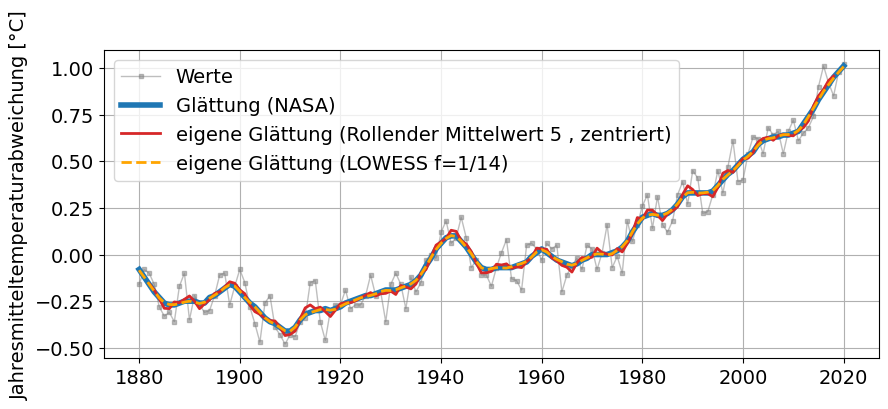

In [16]:
import matplotlib.pyplot as plt

plt.style.use('default')

plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_NASA["Year"],Temp_NASA["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(Temp_NASA["Year"],Temp_NASA["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.plot(Temp_NASA["Year"],Temp_NASA["Rollender Mittelwert (5)"], lw=2,  color="tab:red", label="eigene Glättung (Rollender Mittelwert 5 , zentriert)");
plt.plot(Temp_NASA["Year"],Temp_NASA["Lowess(own)"],ls="--",lw=2,  color="orange", label="eigene Glättung (LOWESS f=1/14)");

plt.legend();
plt.grid();

Die Verwendung des rollenden Mittelwertes hat das Problem, dass dabei immer Werte fehlen (Anfang/Ende). Die gewählten Mit den gewählten Parametern für das LOWESS sind die Ergebnisse ähnlich zur Original Glättung

## Global: Durchschnittstemperatur (Land + Ozean getrennt)

**Aufgabe b)** Stellen Sie die Kurven für die Erwärmung an Landoberfläche und an der Ozeanoberfläche grafisch dar und beschriften Sie das Diagramm entsprechend

### Daten importieren

In [17]:
link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv"

In [18]:
Temp_NASA2 = pd.read_csv(link, header=1) # einlesen
Temp_NASA2 # Ausgabe

,Year,Land_Annual,Lowess(5),Ocean_Annual,Lowess(5).1
0,1880,-0.58,-0.46,-0.05,0.01
1,1881,-0.38,-0.50,0.01,-0.02
2,1882,-0.47,-0.54,0.00,-0.06
3,1883,-0.55,-0.58,-0.06,-0.09
4,1884,-0.83,-0.61,-0.15,-0.12
...,...,...,...,...,...
136,2016,1.46,1.27,0.70,0.62
137,2017,1.36,1.33,0.64,0.64
138,2018,1.21,1.39,0.60,0.65
139,2019,1.41,1.45,0.68,0.67


### Daten plotten

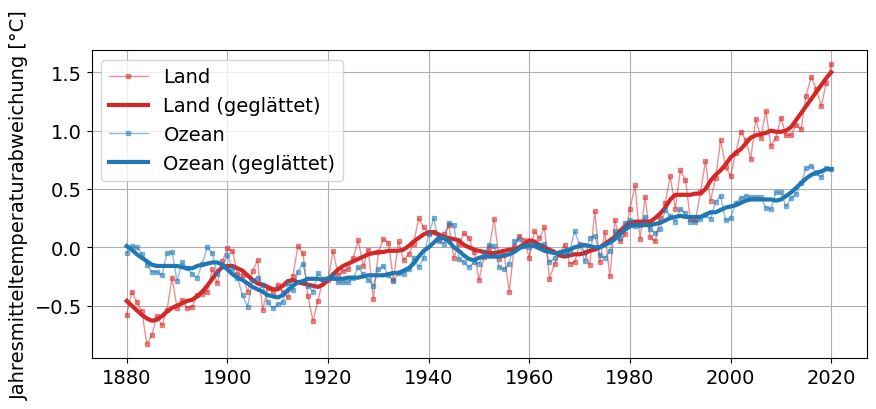

In [19]:
plt.style.use('default')

plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_NASA2["Year"],Temp_NASA2["Land_Annual"], ls="-", lw=1, marker="s", ms=3, color="tab:red", alpha=0.5, label="Land");
plt.plot(Temp_NASA2["Year"],Temp_NASA2["Lowess(5)"], lw=3,  color="tab:red", label="Land (geglättet)");
plt.plot(Temp_NASA2["Year"],Temp_NASA2["Ocean_Annual"], ls="-", lw=1, marker="s", ms=3, color="tab:blue", alpha=0.5, label="Ozean");
plt.plot(Temp_NASA2["Year"],Temp_NASA2["Lowess(5).1"], lw=3,  color="tab:blue", label="Ozean (geglättet)");
plt.legend();
plt.grid();

## Deutschland: Durchschnittstemperatur (Land)

Beim [Umweltbundesamt](https://www.umweltbundesamt.de/daten/klima/trends-der-lufttemperatur#2020-bisher-zweitwarmstes-jahr-in-deutschland) gibt es aktuelle Zahlen zur Erwärmung der Luftemperatur in Deutschland. Die Werte befinden sich in [dieser Exceltabelle](https://www.umweltbundesamt.de/sites/default/files/medien/384/bilder/dateien/3-bis-8_abb-tab_tmt_2021-05-12.xlsx), welche mit dem Befehl `pd.read_excel()` eingelesen werden kann, wobei hierbei der Name des ExcelSheets und die verwendenten Spaltennummern angegeben werden können.

### Daten importieren

In [20]:
# Einlesen
link = "https://www.umweltbundesamt.de/sites/default/files/medien/384/bilder/dateien/3-bis-8_abb-tab_tmt_2021-05-12.xlsx"

Temp_GER = pd.read_excel(link,sheet_name="3_DWD",usecols=[1,19]) # einlesen
Temp_GER.columns=["Jahr","Jahresmitteltemperatur [°C]"]
Temp_GER.to_csv("data/Temp_Deutschland.csv", index=False)

### Daten aufbereiten

In [21]:
# Daten aufbereiten
Temp_GER.dropna(inplace=True) # Zeilen mit "NaN" Werte rausschmeissen und dataframe speichern 
Temp_GER["Jahr"] = Temp_GER["Jahr"].astype(int) # Spalte "Jahr" als integer definieren
Temp_GER

,Jahr,Jahresmitteltemperatur [°C]
1,1881,7.3352
2,1882,8.3661
3,1883,7.9099
4,1884,8.5892
5,1885,7.7726
...,...,...
136,2016,9.5000
137,2017,9.6000
138,2018,10.5000
139,2019,10.3000


In [22]:
# Temperaturabweichung berechnen (Abweichung von Mittelwert der Temperatur zwischen 1881 und 1900)
mean_GER1881_1910 = Temp_GER.loc[Temp_GER["Jahr"] <= 1910,"Jahresmitteltemperatur [°C]"].mean()
Temp_GER["Jahresmitteltemperaturabweichung [°C]"] = Temp_GER["Jahresmitteltemperatur [°C]"] - mean_GER1881_1910
Temp_GER

,Jahr,Jahresmitteltemperatur [°C],Jahresmitteltemperaturabweichung [°C]
1,1881,7.3352,-0.482663
2,1882,8.3661,0.548237
3,1883,7.9099,0.092037
4,1884,8.5892,0.771337
5,1885,7.7726,-0.045263
...,...,...,...
136,2016,9.5000,1.682137
137,2017,9.6000,1.782137
138,2018,10.5000,2.682137
139,2019,10.3000,2.482137


In [23]:
# Glättung
from statsmodels.nonparametric.smoothers_lowess import lowess
Temp_GER["Lowess(own)"] = lowess(Temp_GER["Jahresmitteltemperaturabweichung [°C]"],Temp_GER["Jahr"], frac=1/14)[:,1]
Temp_GER

,Jahr,Jahresmitteltemperatur [°C],Jahresmitteltemperaturabweichung [°C],Lowess(own)
1,1881,7.3352,-0.482663,0.208028
2,1882,8.3661,0.548237,0.179543
3,1883,7.9099,0.092037,0.132242
4,1884,8.5892,0.771337,0.070696
5,1885,7.7726,-0.045263,-0.005329
...,...,...,...,...
136,2016,9.5000,1.682137,2.021745
137,2017,9.6000,1.782137,2.172035
138,2018,10.5000,2.682137,2.314417
139,2019,10.3000,2.482137,2.461835


### Daten plotten

**Aufgabe c)** Stellen Sie folgende Daten zusammen dar:
- global: Land+Ozean (geglättet) <- NASA
- global: Land (geglättet) <- NASA
- Deutschland: Land (Werte) <- DWD
- Deutschland: Land (geglättet) <- DWD

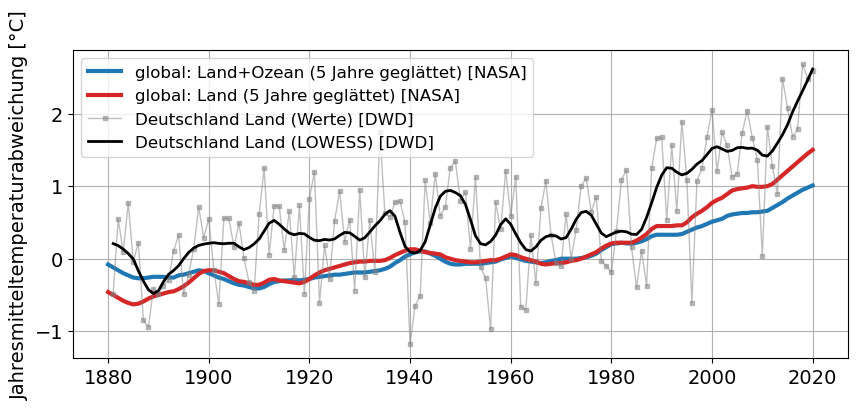

In [24]:
plt.style.use('default')

plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_NASA["Year"],Temp_NASA["Lowess(5)"], lw=3,  color="tab:blue", label="global: Land+Ozean (5 Jahre geglättet) [NASA]");
plt.plot(Temp_NASA2["Year"],Temp_NASA2["Lowess(5)"], lw=3,  color="tab:red", label="global: Land (5 Jahre geglättet) [NASA]");
plt.plot(Temp_GER["Jahr"],Temp_GER["Jahresmitteltemperaturabweichung [°C]"], ls="-", lw=1,marker="s", ms=3, color="gray",alpha=0.5, label="Deutschland Land (Werte) [DWD]");
plt.plot(Temp_GER["Jahr"],Temp_GER["Lowess(own)"], ls="-", lw=2, color="black", label="Deutschland Land (LOWESS) [DWD]");

plt.legend(fontsize=12);
plt.grid();

### Vergleich mit Abbildung aus Leoplodina Factsheet

Vergleichen wir diese Darstellung nun mal mit einer aus dem [Factsheet der Leopoldina](https://doi.org/10.26164/leopoldina_03_00327):

Nationale Akademie der Wissenschaften Leopoldina (2021): Klimawandel: Ursachen,
Folgen und Handlungsmöglichkeiten. Halle (Saale).

![](images/FactSheetLeopoldina_TempGer.png)

Hierbei wurde scheinbar eine sehr starke Glättung der Messdaten verwendet, wir erhöhen also den Wert `frac` für die LOWESS Methode und prüfen ob wir in ähnliche Bereiche kommen

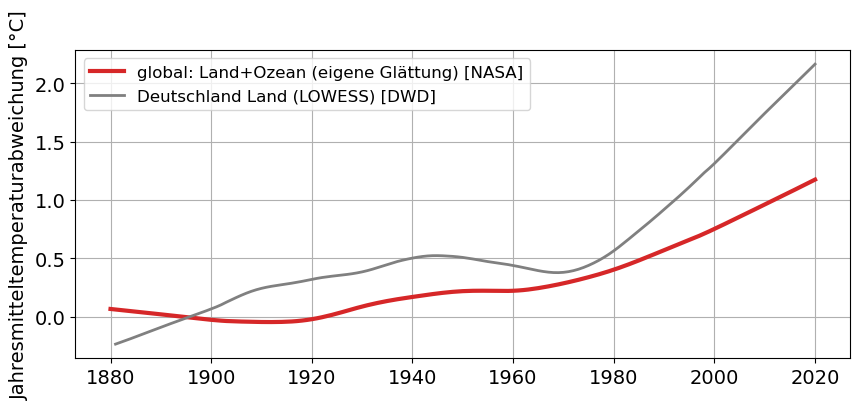

In [25]:
# Glättung
from statsmodels.nonparametric.smoothers_lowess import lowess
Temp_GER["Lowess(own2)"] = lowess(Temp_GER["Jahresmitteltemperaturabweichung [°C]"],Temp_GER["Jahr"], frac=1/3)[:,1]
Temp_GER_Lowess_own2_mean_untill_1910 = Temp_GER.loc[Temp_GER["Jahr"] <= 1910,"Lowess(own2)"].mean()
Temp_GER["Lowess(own2)"] = Temp_GER["Lowess(own2)"] - Temp_GER_Lowess_own2_mean_untill_1910

Temp_NASA["Lowess(own3)"] = lowess(Temp_NASA["No_Smoothing"],Temp_NASA["Year"], frac=1/3)[:,1]
Temp_NASA_Lowess_own3_mean_untill_1910 = Temp_NASA.loc[Temp_NASA["Year"] <= 1910,"Lowess(own3)"].mean()
Temp_NASA["Lowess(own3)"] = Temp_NASA["Lowess(own3)"] - Temp_NASA_Lowess_own3_mean_untill_1910


plt.style.use('default')

plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_NASA["Year"],Temp_NASA["Lowess(own3)"], lw=3,  color="tab:red", label="global: Land+Ozean (eigene Glättung) [NASA]");
plt.plot(Temp_GER["Jahr"],Temp_GER["Lowess(own2)"], ls="-", lw=2, color="gray", label="Deutschland Land (LOWESS) [DWD]");

plt.legend(fontsize=12);
plt.grid();

Ausgabe der Temperaturdifferenz im Jahr 2020

In [26]:
Temp_NASA.loc[Temp_NASA["Year"] == 2020]

,Year,No_Smoothing,Lowess(5),Rollender Mittelwert (5),Lowess(own),Lowess(own3)
140,2020,1.02,1.01,NaN,1.006583,1.174534


In [27]:
Temp_GER.loc[Temp_GER["Jahr"] == 2020]

,Jahr,Jahresmitteltemperatur [°C],Jahresmitteltemperaturabweichung [°C],Lowess(own),Lowess(own2)
140,2020,10.4,2.582137,2.61447,2.164246


**Zusatzaufgabe** : Bestimmen Sie den linearen Anstieg für die Temperaturwerte  von Deutschland (LOWESS mit frac=1)

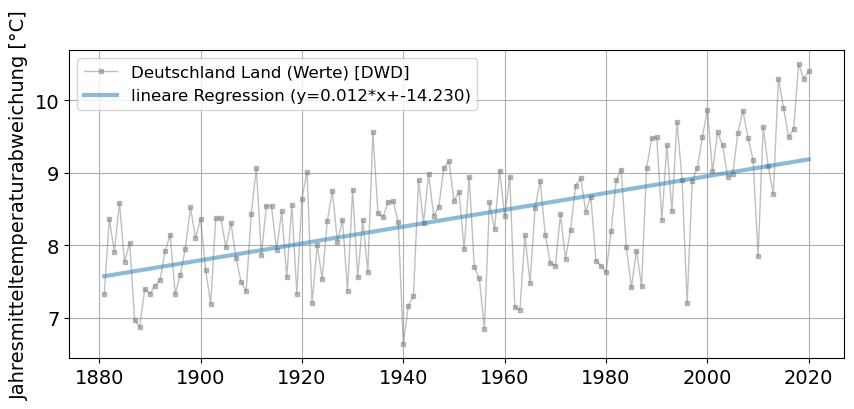

In [28]:
import numpy as np
import pandas as pd

x=Temp_GER["Jahr"]
y=Temp_GER["Jahresmitteltemperatur [°C]"]
model = np.polyfit(x, y, 1) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0]*x+model[1]

plt.style.use('default')
plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_GER["Jahr"],Temp_GER["Jahresmitteltemperatur [°C]"], ls="-", lw=1,marker="s", ms=3, color="gray",alpha=0.5, label="Deutschland Land (Werte) [DWD]");
plt.plot(x,y_model, ls="-", lw=3, color="tab:blue",alpha=0.5, label=f"lineare Regression (y={model[0]:.3f}*x+{model[1]:.3f})");
plt.legend(fontsize=12);
plt.grid();

In [29]:
print(f"Temperaturanstieg pro Jahr (von 1981 bis 2020): {model[0]:.3f}°C/Jahr")
print(f"Temperaturanstieg seit Beginn der Messung: {(y_model.iloc[-1]-y_model.iloc[0]):.3f}°C")

Temperaturanstieg pro Jahr (von 1981 bis 2020): 0.012°C/Jahr
Temperaturanstieg seit Beginn der Messung: 1.611°C


**Vorsicht**: Die lineare Regression bezieht hier den ganzen Zeitraum mit ein, betrachten wir für den Temperaturgradienten nur die Daten von 1980 bis 2020:

In [30]:
x=Temp_GER.loc[Temp_GER["Jahr"] >= 1980,"Jahr"]
y=Temp_GER.loc[Temp_GER["Jahr"] >= 1980,"Jahresmitteltemperatur [°C]"]
model = np.polyfit(x, y, 1) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0]*x+model[1]
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0]:.3f}°C/Jahr")

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.045°C/Jahr


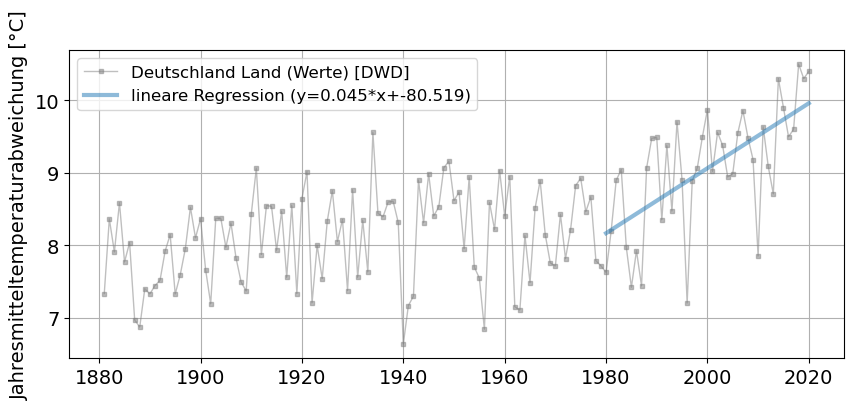

In [31]:
plt.style.use('default')
plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.plot(Temp_GER["Jahr"],Temp_GER["Jahresmitteltemperatur [°C]"], ls="-", lw=1,marker="s", ms=3, color="gray",alpha=0.5, label="Deutschland Land (Werte) [DWD]");
plt.plot(x,y_model, ls="-", lw=3, color="tab:blue",alpha=0.5, label=f"lineare Regression (y={model[0]:.3f}*x+{model[1]:.3f})");
plt.legend(fontsize=12);
plt.grid();

## Treibhausgasemissionen

Zunächst stellen wir die Treibhausgas-Konzentrationen dar <br>
Quelle : [Umweltbundesamt](https://www.umweltbundesamt.de/daten/klima/atmosphaerische-treibhausgas-konzentrationen#beitrag-langlebiger-treibhausgase-zum-treibhauseffekt)

### Daten imortieren

In [32]:
link = "https://www.umweltbundesamt.de/sites/default/files/medien/384/bilder/dateien/6_abb_treibhausgas-gesamt-konz_2020-06-03.xlsx"

THG_Emission_UBA = pd.read_excel(link,sheet_name="Daten",usecols=[1,2],header=8) # einlesen
THG_Emission_UBA.to_csv("data/THG_Emission_UBA.csv")

### Daten Plotten

**Aufgabe d)** Stellen Sie die Treibhausgasemissionen über die Jahre dar

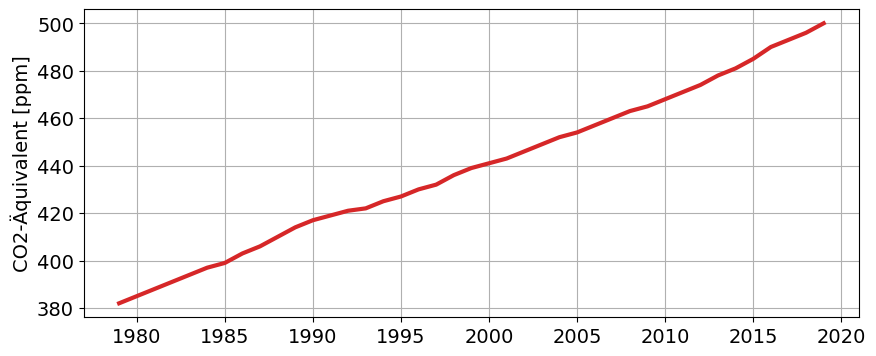

In [33]:
plt.style.use('default')

plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("CO2-Äquivalent [ppm]")
plt.plot(THG_Emission_UBA["Jahr"],THG_Emission_UBA["CO2-eq\n(ppm)"], lw=3,  color="tab:red");
plt.grid();

## Vergleich zweier CO2 Messtationen 

Auf der Seite vom Umweltbundesamt findet man auch CO2 Messwerte verschiedener Messtationen: <br>
Quelle : [Umweltbundesamt](https://www.umweltbundesamt.de/daten/klima/atmosphaerische-treibhausgas-konzentrationen#kohlendioxid-)

[Quelle Welttrend WMO](https://gaw.kishou.go.jp/publications/global_mean_mole_fractions#content2) <br>
[Quelle Mauna Loa](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html) <br>
[Quelle Schauinsland  und Zugspitze](http://www.uba.de/gaw)

In [34]:
link="https://www.umweltbundesamt.de/sites/default/files/medien/384/bilder/dateien/2-4_abb_langzeitreihen-konz_2021-05-26.xlsx"

CO2_Emission_UBA = pd.read_excel(link,sheet_name="Kohlendioxid-Daten",usecols=[0,1,2,3,4]) # einlesen
CO2_Emission_UBA.columns = ["Jahr","Mauna Loa, Hawaii","Schauinsland","Zugspitze","Welttrend WMO"]
CO2_Emission_UBA.to_csv("data/CO2_Emission_UBA.csv")
CO2_Emission_UBA.head()


,Jahr,"Mauna Loa, Hawaii",Schauinsland,Zugspitze,Welttrend WMO
0,1957.500000,NaN,NaN,NaN,NaN
1,1957.583333,NaN,NaN,NaN,NaN
2,1957.666667,315.70,NaN,NaN,NaN
3,1957.750000,317.45,NaN,NaN,NaN
4,1957.833333,317.51,NaN,NaN,NaN


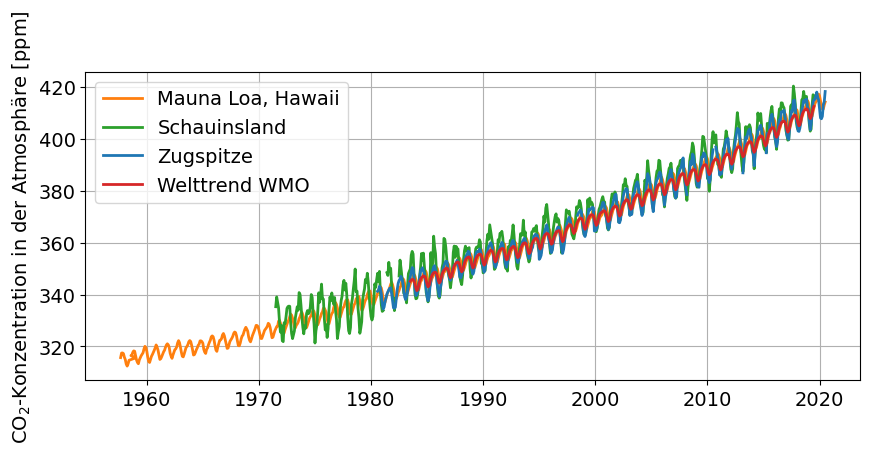

In [35]:
plt.style.use('default')

plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("$\mathrm{CO_2}$-Konzentration in der Atmosphäre [ppm]")
plt.plot(CO2_Emission_UBA["Jahr"],CO2_Emission_UBA["Mauna Loa, Hawaii"], lw=2,  label="Mauna Loa, Hawaii", c="tab:orange");
plt.plot(CO2_Emission_UBA["Jahr"],CO2_Emission_UBA["Schauinsland"], lw=2,  label="Schauinsland", c="tab:green");
plt.plot(CO2_Emission_UBA["Jahr"],CO2_Emission_UBA["Zugspitze"], lw=2,  label="Zugspitze", c="tab:blue");
plt.plot(CO2_Emission_UBA["Jahr"],CO2_Emission_UBA["Welttrend WMO"], lw=2,  label="Welttrend WMO", c="tab:red");

plt.legend();
plt.grid();

## Übersicht Treibhausgase

[Quelle: Umweltbundesamt](https://www.umweltbundesamt.de/daten/klima/atmosphaerische-treibhausgas-konzentrationen#beitrag-langlebiger-treibhausgase-zum-treibhauseffekt)

Excel-Tabelle: https://www.umweltbundesamt.de/sites/default/files/medien/384/bilder/dateien/5_abb_beitrag-treibhauseffekt-co2-thg_2021-05-26.xlsx

Quelle Daten: NOAA Earth System Research Laboratory, The NOAA annual greenhouse gas index (AGGI), https://www.esrl.noaa.gov/gmd/aggi/aggi.html

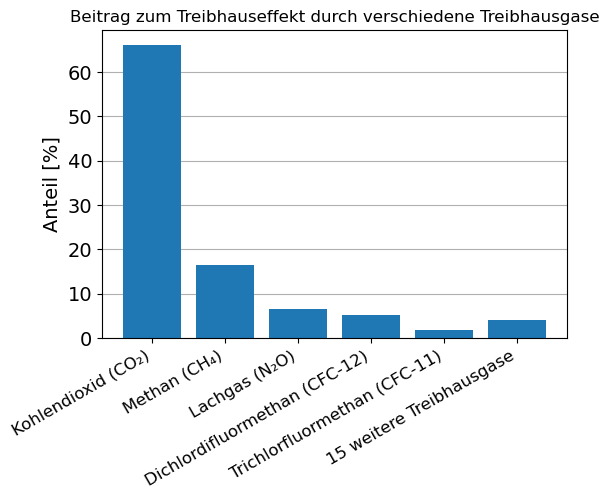

In [36]:
# Daten
Beitrag = np.array([2076,516,202,161,57,129])
Beitrag_Prozent = Beitrag/Beitrag.sum()*100
Bezeichnung = np.array(["Kohlendioxid (CO₂)","Methan (CH₄)","Lachgas (N₂O)","Dichlordifluormethan (CFC-12)","Trichlorfluormethan (CFC-11)","15 weitere Treibhausgase"])

# Plot
plt.figure(figsize=(6,4));
plt.rcParams['font.size'] = 14;
plt.bar(Bezeichnung,Beitrag_Prozent);
plt.ylabel('Anteil [%]');
plt.title('Beitrag zum Treibhauseffekt durch verschiedene Treibhausgase', fontsize=12);
plt.xticks(rotation=30, ha='right', fontsize=12);
plt.grid(axis='y');
plt.gca().set_axisbelow(True);

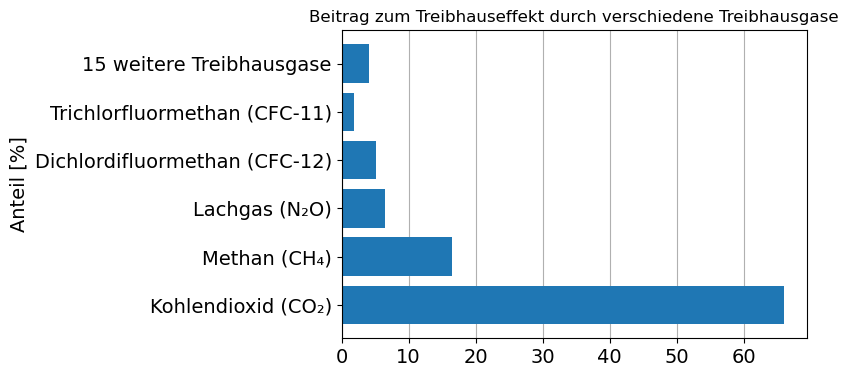

In [37]:
# Daten
Beitrag = np.array([2076,516,202,161,57,129])
Beitrag_Prozent = Beitrag/Beitrag.sum()*100
Bezeichnung = np.array(["Kohlendioxid (CO₂)","Methan (CH₄)","Lachgas (N₂O)","Dichlordifluormethan (CFC-12)","Trichlorfluormethan (CFC-11)","15 weitere Treibhausgase"])

# Plot
plt.figure(figsize=(6,4))
plt.rcParams['font.size'] = 14;
plt.barh(Bezeichnung,Beitrag_Prozent)
plt.ylabel('Anteil [%]')
plt.title('Beitrag zum Treibhauseffekt durch verschiedene Treibhausgase', fontsize=12);
plt.grid(axis='x');
plt.gca().set_axisbelow(True);

Wenn wir die Einträge sortieren möchten, müssen wir die Listen in ein `pandas` `dataframe` einfügen

In [38]:
THG_Anteil = pd.DataFrame(data=([Bezeichnung,Beitrag,Beitrag_Prozent])).T
THG_Anteil.columns=["Name","Anteil","Anteil [%]"]
THG_Anteil

,Name,Anteil,Anteil [%]
0,Kohlendioxid (CO₂),2076,66.093601
1,Methan (CH₄),516,16.427889
2,Lachgas (N₂O),202,6.431073
3,Dichlordifluormethan (CFC-12),161,5.125756
4,Trichlorfluormethan (CFC-11),57,1.814709
5,15 weitere Treibhausgase,129,4.106972


In [39]:
THG_Anteil.sort_values("Anteil [%]",ascending=False, inplace=True)
THG_Anteil

,Name,Anteil,Anteil [%]
0,Kohlendioxid (CO₂),2076,66.093601
1,Methan (CH₄),516,16.427889
2,Lachgas (N₂O),202,6.431073
3,Dichlordifluormethan (CFC-12),161,5.125756
5,15 weitere Treibhausgase,129,4.106972
4,Trichlorfluormethan (CFC-11),57,1.814709


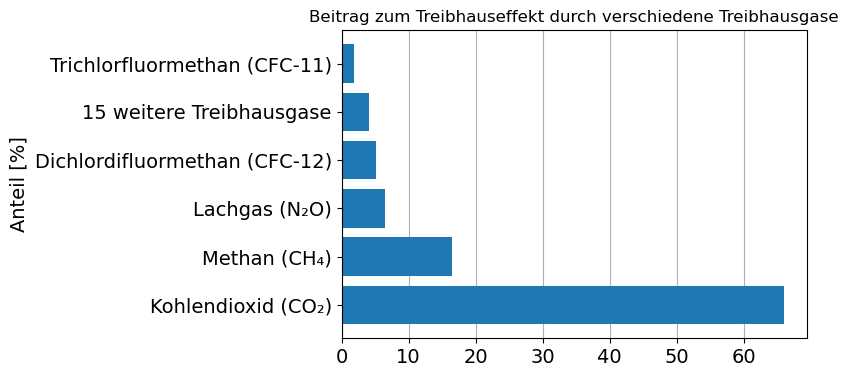

In [40]:
# Plot
plt.figure(figsize=(6,4))
plt.rcParams['font.size'] = 14;
plt.barh(THG_Anteil["Name"],THG_Anteil["Anteil [%]"])
plt.ylabel('Anteil [%]')
plt.title('Beitrag zum Treibhauseffekt durch verschiedene Treibhausgase', fontsize=12);
plt.grid(axis='x');
plt.gca().set_axisbelow(True);